In [8]:
from src.models.modulated_siren import ModulatedSirenModel
from src.datasets.chairs import get_mgrid
import torch

In [9]:
from src.models.modulated_siren import ModulatedSirenModel
import pytorch_lightning as pl

# Create an instance of the ModulatedSirenModel
model = ModulatedSirenModel(in_features=2, hidden_features=256, hidden_layers=2, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

# Load the checkpoint
checkpoint_path = "/home/arkadi.piven/Code/functa/checkpoints/all_chairs_fully_fledged_meta_learning/last.ckpt"
model = model.load_from_checkpoint(checkpoint_path, in_features=2, hidden_features=256, hidden_layers=10, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

LR IS 3e-06


LR IS 3e-06


Chairs dataset initialized
['292621234cdb42969c76680ce8100088', '768843209e734d569d1b527c1f3511a1', '66624c84a4d94559b35914ee2ada4c4b', 'a9328e057fe049ff8b0c35489e0dfb8d', '607a3bf3fbc54bd2b9da08c18f625ee4', '039c6026571943d6ac45c6816bcc7ff1', '4c302192035d40e59b7c0f18bb74f212', '6a', 'd2d5000b1e7a4d9a8a4a637267418061', '0f7366550f694e1cb9efddea214a3c33', '9f7890238c4442d789d1970cead93203', '3efb9e42f49f47c6bd1d36f86281888b', '9d53c4f8a4394a9ca333da20138cd897', '79c0f5d111324264b4c6fea9402df88e', '4e', 'c6e96', 'c25d29', '03f16302c1a54c46b438dac78e9d7048', '600e', '64b170e4864549c382b6c94c529203d7', '2820827abdcd4e79b7c67683292416aa', '934b7b5515da4720b0af2764924aad3a', '053039b95c314104b5fe0dfb19f43cb3', '43c8828e83124e1e90e85c9e57b404c8', '2ec01ec1eb874f6fb11ef732fb575267', '392e2810e1e24b02b2fdbc1dd3f21064', 'fab9443d48e24fbfa309187df78d58e6', '0edcc9053a114e7f8a706cae0864e7be', 'b10ee58a01b649d381598d899850176c', '15b2ebce6f084c3ea8d582c168ff478e', 'ddd35916c5d84fd8ab4c38380a73fb5b

tensor([[ 0.0005,  0.0004,  0.0011],
        [ 0.0005,  0.0003,  0.0012],
        [ 0.0005,  0.0003,  0.0012],
        ...,
        [ 0.0011,  0.0008, -0.0011],
        [ 0.0011,  0.0008, -0.0011],
        [ 0.0010,  0.0007, -0.0011]], grad_fn=<AddBackward0>)


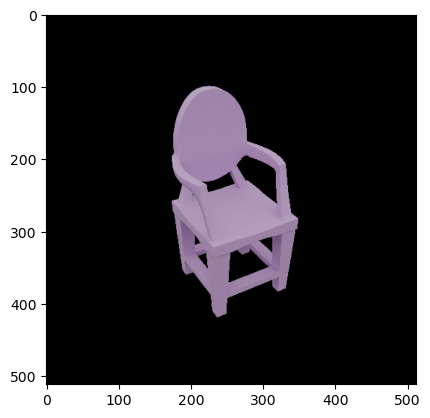

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.datamodules.chairs_datamodule import ChairsDatamodule
import torchvision. transforms as T
from PIL import Image

# Define the grid
chairs = ChairsDatamodule("/home/arkadi.piven/Code/functa/rendered/chair", 1)
transform = T.ToPILImage()
coords, pixels = chairs.train_dataset[6]
print(chairs.train_dataset.get_chair_name_by_idx(6))
coords = get_mgrid(512, 2)
print(pixels)
pixels = pixels * 0.5 + 0.5
# # Pass the coordinates through the model
model.phi.data = torch.zeros(256)
output = model(coords)
output = output * 0.5 + 0.5
print(output)


# Reshape the output to (512, 512, 3)
# print(output.shape)

# # Plot the image

plt.imshow(pixels.view(512,512,3).detach().numpy())

# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


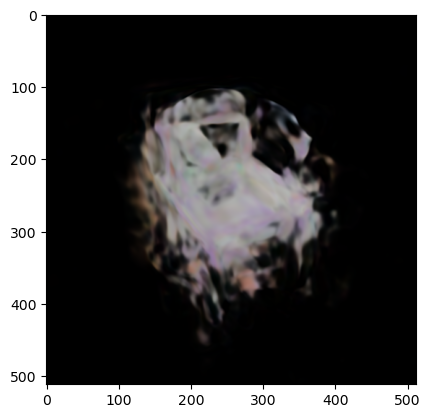

In [11]:
# Output base weights
plt.imshow(output.view(512,512,3).detach().numpy())

## Train latent and visualize

In [13]:
batch = chairs.train_dataset[0]
print(f"BEGIN OF TRAINING PHI {model.phi}")
model.train_latent(batch)
print(f"END OF TRAINING PHI {model.phi}")
coords = get_mgrid(512, 2)

output = model(coords)
output = output * 0.5 + 0.5
print(output)

print(output.shape)

# Plot the image
plt.imshow(output.view(512,512,3).detach().numpy())

plt.show()


BEGIN OF TRAINING PHI Parameter containing:
tensor([ 4.5645e-04,  2.5816e-03,  3.4308e-03,  3.0041e-03,  5.3713e-03,
         3.0716e-04, -3.1643e-03, -1.8095e-03, -5.8117e-03,  5.5521e-05,
        -4.3075e-03,  2.4650e-03, -7.2338e-04, -3.2391e-04,  3.9269e-03,
        -3.0669e-03,  5.3730e-03, -2.2797e-03,  2.4431e-03,  5.3130e-04,
        -4.4014e-04, -6.0502e-04,  2.0334e-03, -1.2492e-03, -7.8050e-04,
         3.3521e-03,  3.8514e-03, -9.5146e-04, -1.0149e-03, -7.4234e-04,
        -1.1525e-04, -4.0024e-03, -1.8207e-03,  3.2347e-03,  3.5905e-03,
         3.9303e-03, -7.2384e-04,  8.7942e-04, -2.5415e-03,  3.8850e-03,
         2.8153e-03, -2.7354e-03, -2.8560e-03, -1.2149e-03, -6.0544e-03,
        -2.7978e-03, -1.2565e-03, -2.6611e-03,  3.5110e-03, -1.7743e-03,
         1.6577e-03,  2.2289e-03, -5.3218e-03, -7.9804e-03,  5.9823e-04,
        -1.5654e-03,  6.4643e-04,  2.9922e-03, -1.0915e-03,  3.6848e-03,
        -2.2483e-03,  1.1358e-03, -1.1416e-03,  5.3543e-03, -2.6740e-04,
       

  0%|          | 0/3 [00:00<?, ?it/s]

START PHI: Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.,

 33%|███▎      | 1/3 [00:15<00:30, 15.16s/it]

END PHI: Parameter containing:
tensor([-2.8208e-03,  1.1195e-03,  3.6263e-04, -6.1875e-04,  4.9094e-03,
        -3.2506e-04,  1.6786e-03, -3.4630e-03, -2.4737e-04, -5.9998e-04,
         3.6410e-04,  5.6258e-03,  2.5218e-03, -9.3843e-04,  1.1510e-03,
         5.5386e-04,  6.1935e-03, -1.4011e-03,  1.4730e-03, -3.9234e-03,
         1.5083e-03,  3.7578e-03,  8.9593e-04, -1.0414e-03,  1.5668e-04,
        -1.0178e-03,  3.6226e-03, -5.3679e-04,  1.3970e-04, -1.7864e-03,
         3.0498e-03, -2.4980e-03,  3.0630e-03,  2.1483e-04,  3.1234e-03,
         6.9340e-04,  1.4518e-04, -2.3544e-03, -4.9628e-03, -3.1132e-04,
         9.6492e-04,  3.3024e-03, -1.4903e-03,  8.2871e-04, -1.3387e-03,
        -4.5726e-03, -3.3048e-03, -1.6167e-03, -3.5807e-04,  6.6156e-04,
         1.3963e-03, -2.8169e-03,  4.7491e-04, -1.5852e-03,  4.2806e-04,
         1.0339e-03,  3.3680e-04, -6.5807e-04, -1.6323e-03, -7.5824e-04,
         2.7483e-03, -2.5855e-03, -2.9001e-03,  4.4709e-03, -1.4934e-04,
        -1.8724e-03,

 67%|██████▋   | 2/3 [00:30<00:15, 15.11s/it]

END PHI: Parameter containing:
tensor([ 1.0903e-03, -1.9074e-04,  2.5616e-03,  4.0101e-03,  5.8303e-03,
        -5.1028e-05, -2.8904e-03, -2.5364e-03, -2.2906e-05,  5.1458e-03,
         4.5962e-04,  9.7001e-03,  2.4508e-03, -1.5104e-03,  3.5649e-03,
        -1.0713e-03,  5.1306e-03, -5.4721e-04,  3.0047e-03, -2.7412e-03,
        -1.1855e-04, -1.2881e-03,  3.9345e-03, -2.8800e-04, -1.6098e-04,
         7.8433e-04,  6.7895e-04, -1.4621e-03,  5.0265e-03, -2.2093e-03,
         4.9482e-03, -2.6084e-03,  3.2869e-03,  2.0394e-03,  1.2030e-03,
         3.9093e-03, -4.9187e-03, -2.8462e-03, -2.1644e-03,  2.4750e-03,
        -4.7619e-04,  4.2974e-03, -2.3124e-03,  1.7459e-03, -3.8136e-03,
        -3.8076e-03, -2.0160e-03, -1.0554e-03,  6.1661e-03,  2.3322e-03,
        -1.2526e-04, -1.3254e-03,  8.5796e-04, -1.9878e-03,  9.2674e-04,
        -3.2389e-03, -4.5271e-04,  3.7309e-03, -1.7523e-03, -5.7240e-04,
         1.1751e-03, -4.6636e-03, -5.9252e-03,  3.4045e-03,  1.8417e-03,
        -4.5180e-03,

100%|██████████| 3/3 [00:51<00:00, 17.02s/it]

END PHI: Parameter containing:
tensor([ 1.4079e-03,  9.3058e-04,  1.6209e-03,  3.4908e-03,  7.2339e-03,
         6.9866e-04, -1.4405e-03, -1.5205e-03, -9.0483e-04,  3.0709e-03,
         4.1497e-04,  9.5239e-03,  4.6634e-03,  2.7183e-05,  2.6789e-03,
         1.2044e-03,  6.6914e-03, -2.0572e-03,  6.5212e-03, -2.0743e-03,
        -7.0882e-04,  9.1707e-04,  2.1973e-03, -6.6892e-04,  2.4734e-04,
         7.6351e-04, -4.8113e-04, -4.1757e-03,  2.8285e-03, -1.1381e-03,
         4.8783e-03, -3.1937e-03,  3.8012e-03,  2.2855e-03,  3.7820e-03,
         5.2929e-03, -4.3647e-03, -2.0923e-03, -2.9403e-03,  5.1064e-04,
         1.2719e-03,  5.0099e-03, -4.2312e-03,  7.5019e-04, -3.0304e-03,
        -6.1151e-03, -2.2254e-03, -2.8360e-03,  5.1918e-03,  2.7069e-03,
         5.7817e-04, -3.9196e-04,  3.1983e-05, -4.0726e-03,  1.3201e-03,
        -3.0387e-03, -1.4263e-03,  5.2066e-03, -3.2504e-03, -2.1261e-03,
         1.7282e-04, -3.6481e-03, -5.7256e-03,  2.4312e-03,  2.6580e-03,
        -4.5730e-03,